# Body Fat example from
https://www2.stetson.edu/~jrasp/data.htm

https://www2.stetson.edu/~jrasp/data/BodyFat.xls

In [22]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pandas.plotting import scatter_matrix

sns.set(font_scale=1.5)

%matplotlib inline

In [32]:
df = pd.read_csv('BodyFat.csv.gz', index_col='IDNO')
df = df.drop(columns=[df.columns[-1]])
# df['WEIGHT'].dtype
df.head()

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,,
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


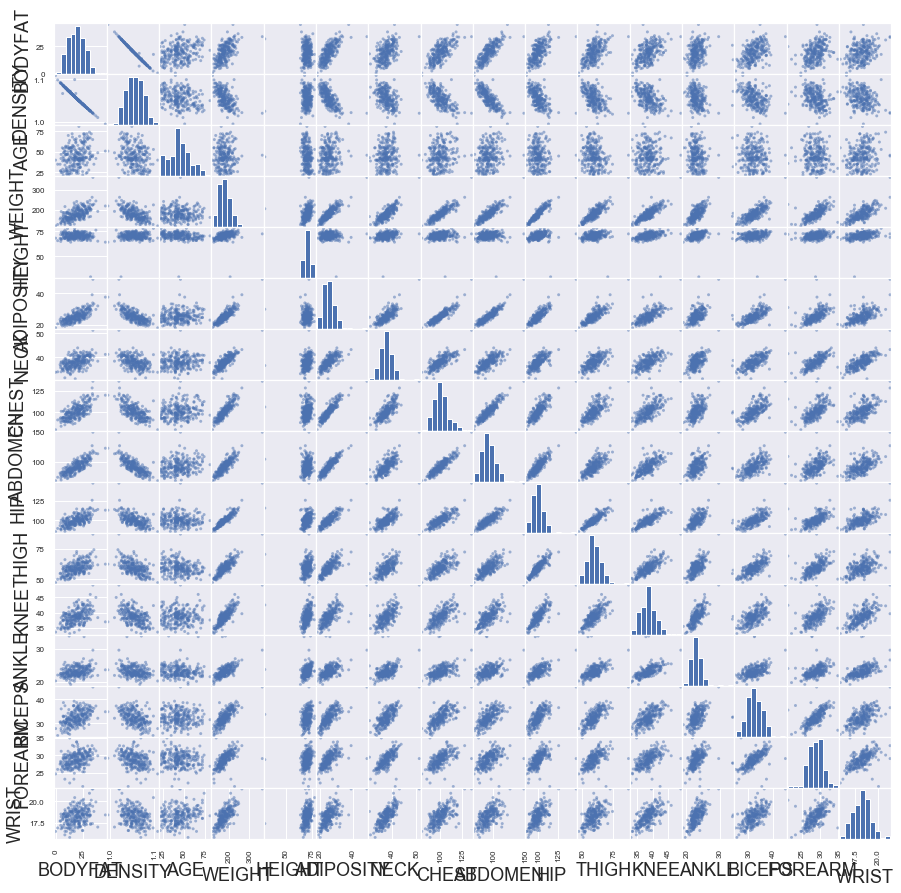

In [37]:
scatter_matrix(df, figsize=(15,15));
# plt.tight_layout()

In [39]:
with pm.Model() as model:
        pm.glm.GLM.from_formula('BODYFAT ~ NECK', df)
        trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, NECK, Intercept]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:38<00:00, 288.22draws/s]
The acceptance probability does not match the target. It is 0.881957417372123, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1398c19e8>,
      dtype=object)

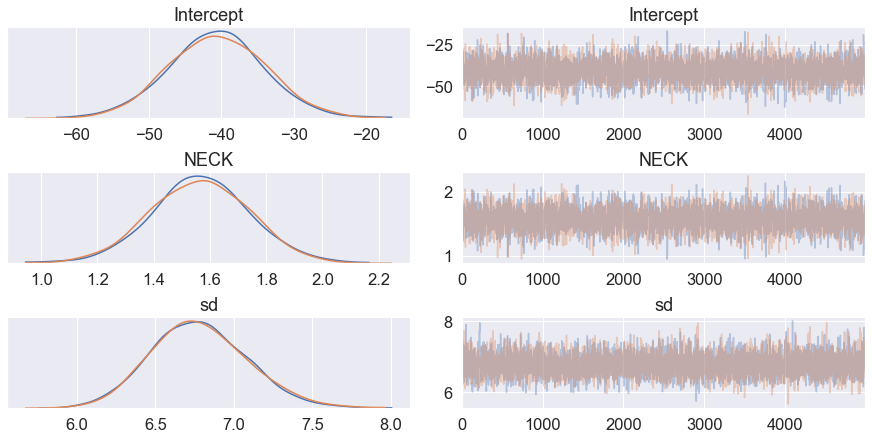

In [40]:
pm.traceplot(trace)

In [41]:
pm.summary(trace)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-40.550860,6.648520,0.110036,-53.493330,-27.149298,3286.806787,1.000125
NECK,1.566116,0.174557,0.002886,1.210995,1.899941,3298.589715,1.000102
sd,6.780941,0.305182,0.004715,6.194300,7.384174,4061.717908,0.999980


In [42]:
with pm.Model() as model:
        pm.glm.GLM.from_formula('BODYFAT ~ NECK + THIGH', df)
        trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, THIGH, NECK, Intercept]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:57<00:00, 192.85draws/s]
The acceptance probability does not match the target. It is 0.8810841491348281, but should be close to 0.8. Try to increase the number of tuning steps.


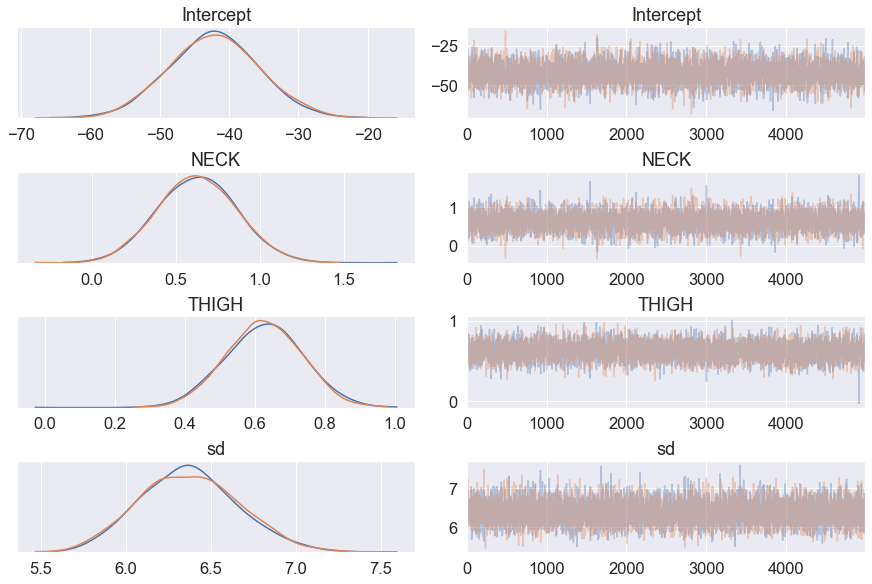

In [45]:
pm.traceplot(trace);

In [46]:
pm.summary(trace)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-42.171139,6.461887,0.088100,-54.004086,-28.727532,4480.763023,1.000015
NECK,0.628805,0.232674,0.003718,0.177064,1.078297,3509.486113,0.999930
THIGH,0.626521,0.108216,0.001616,0.421239,0.842040,4856.969789,0.999909
sd,6.374960,0.290499,0.003413,5.814857,6.933320,6243.781053,0.999900


In [47]:
with pm.Model() as model:
        pm.glm.GLM.from_formula('BODYFAT ~ NECK + THIGH + DENSITY', df)
        trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, DENSITY, THIGH, NECK, Intercept]
Sampling 2 chains: 100%|██████████| 11000/11000 [03:42<00:00, 49.34draws/s]
The acceptance probability does not match the target. It is 0.8993518484456472, but should be close to 0.8. Try to increase the number of tuning steps.


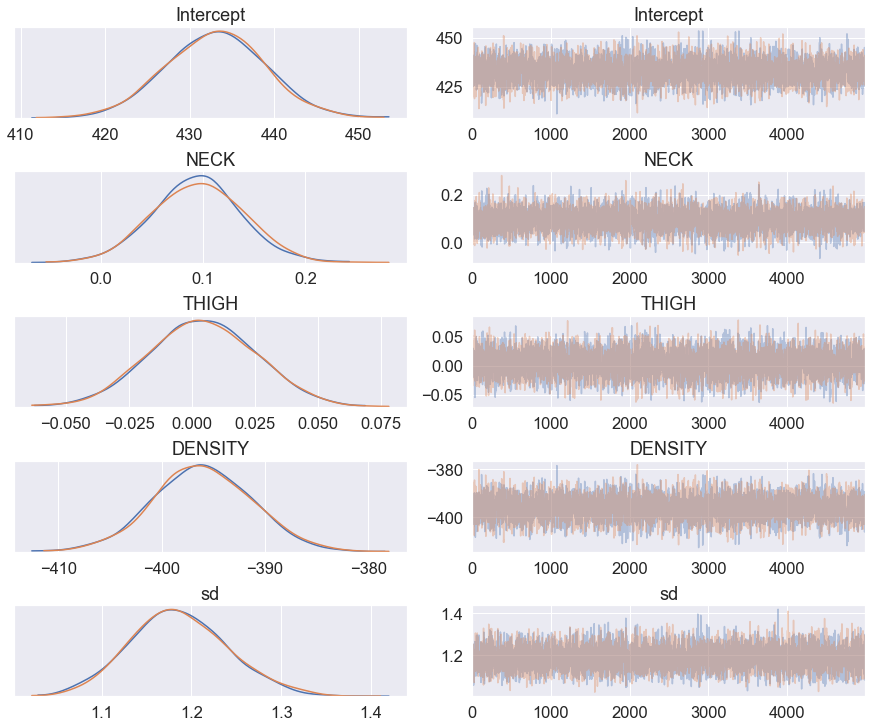

In [48]:
pm.traceplot(trace);

In [49]:
pm.summary(trace)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,433.086995,5.832609,0.087639,421.466448,444.530888,4363.497456,1.000240
NECK,0.094719,0.043303,0.000569,0.007713,0.178373,4841.549140,1.000410
THIGH,0.004238,0.021262,0.000278,-0.036553,0.046576,4750.056582,0.999918
DENSITY,-395.992458,4.743908,0.070845,-405.989773,-387.148177,4479.055652,1.000125
sd,1.186465,0.053907,0.000708,1.082406,1.294017,5929.522059,1.000194


In [50]:
cols = df.columns[1:]
' + '.join(cols)

'DENSITY + AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST'

In [51]:
cols = df.columns[1:]
with pm.Model() as model:
        pm.glm.GLM.from_formula('BODYFAT ~ {}'.format(' + '.join(cols)), df)
        trace = pm.sample(5000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, WRIST, FOREARM, BICEPS, ANKLE, KNEE, THIGH, HIP, ABDOMEN, CHEST, NECK, ADIPOSITY, HEIGHT, WEIGHT, AGE, DENSITY, Intercept]
Sampling 2 chains: 100%|██████████| 11000/11000 [20:29<00:00,  8.94draws/s]
The acceptance probability does not match the target. It is 0.9847971638230669, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9804407132475224, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


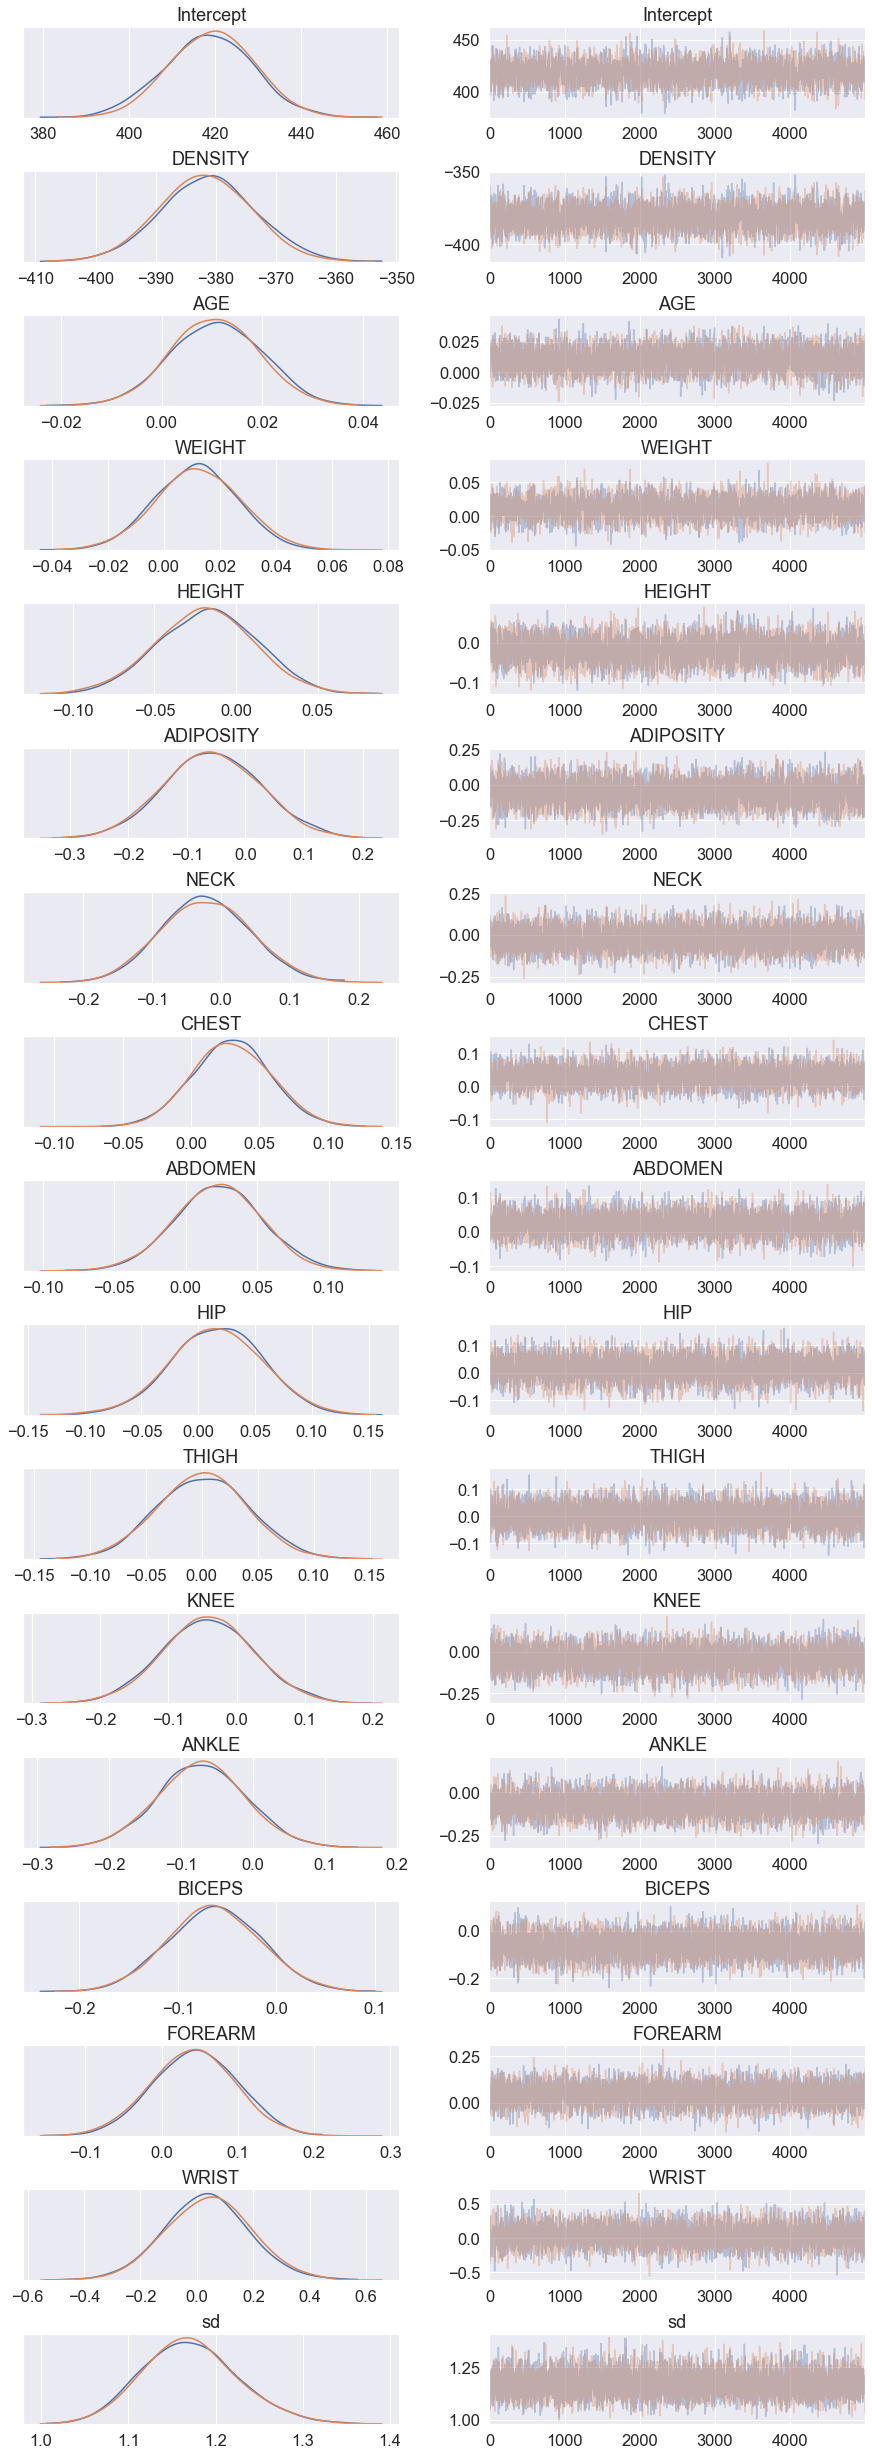

In [52]:
pm.traceplot(trace);

In [53]:
pm.summary(trace)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,418.964771,10.080451,0.210928,398.498813,438.114119,2221.390920,1.002324
DENSITY,-381.500703,7.749307,0.140042,-396.378977,-365.901020,2696.758782,1.001741
AGE,0.010748,0.008925,0.000146,-0.007222,0.027409,4218.308612,1.000687
WEIGHT,0.011947,0.014765,0.000330,-0.016687,0.040760,2354.104801,1.000904
HEIGHT,-0.017890,0.030068,0.000603,-0.077175,0.040257,2855.806832,1.001355
ADIPOSITY,-0.055676,0.081618,0.001332,-0.220193,0.101136,4058.074381,1.000230
NECK,-0.021326,0.064581,0.000967,-0.146146,0.104593,4476.678093,0.999974
CHEST,0.029649,0.028400,0.000420,-0.025390,0.084795,4380.060094,0.999904
ABDOMEN,0.023025,0.030241,0.000484,-0.038365,0.081048,3348.722681,1.000440
HIP,0.016566,0.040322,0.000687,-0.062033,0.095645,3295.312351,1.000071


In [57]:
df['D_cat'] = pd.qcut(df['DENSITY'], 5)

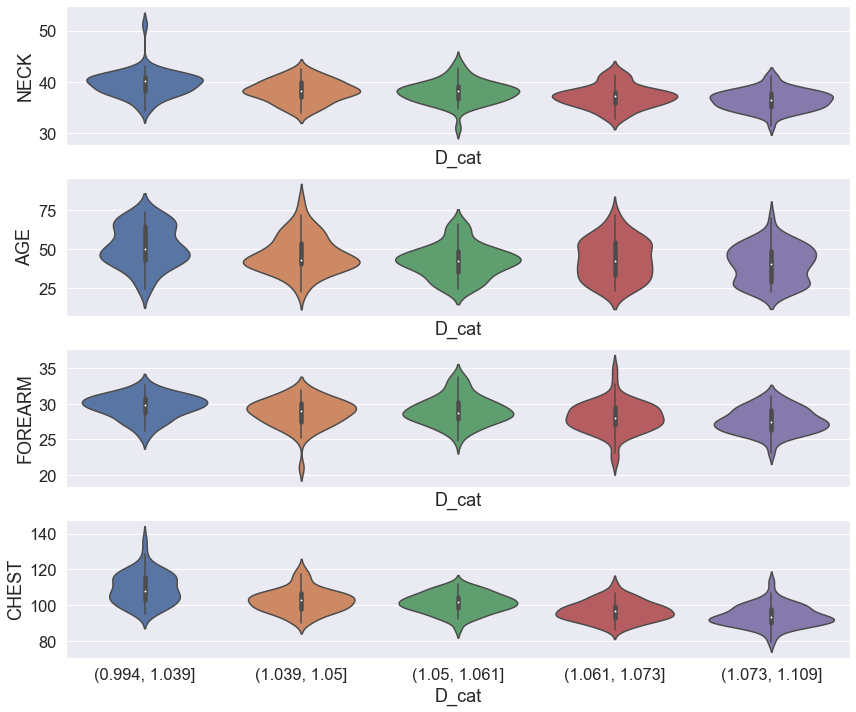

In [68]:
fig, ax = plt.subplots(4,1, figsize=(12, 10), sharex=True)
sns.violinplot(x='D_cat', y='NECK', data=df, ax=ax[0])
sns.violinplot(x='D_cat', y='AGE', data=df, ax=ax[1])
sns.violinplot(x='D_cat', y='FOREARM', data=df, ax=ax[2])
sns.violinplot(x='D_cat', y='CHEST', data=df, ax=ax[3])


plt.tight_layout()